### Context ###

The data consists of measurements made on patients with malignant melanoma. Each patient
had their tumour removed by surgery at the Department of Plastic Surgery, University Hospital
of Odense, Denmark during the period 1962 to 1977. The surgery consisted of complete
removal of the tumour together with about 2.5cm of the surrounding skin.
Among the measurements taken were the thickness of the tumour and whether it was
ulcerated or not. These are thought to be important prognostic variables in that patients with a
thick and/or ulcerated tumour have an increased chance of death from melanoma. Patients
were followed until the end of 1977. The data frame contains the following columns.

• time - Survival time in days since the operation.

• status - The patients status at the end of the study

1 indicates that they had died from melanoma, 2 indicates that they were still alive and 3
indicates that they had died from causes unrelated to their melanoma.

• sex - The patients sex; 1=male, 0=female.

• age - Age in years at the time of the operation.

• year - Year of operation.

• thickness - Tumour thickness in mm.

• ulcer - Indicator of ulceration; 1=present, 0=absent

## Task
As a data scientist, you are tasked to ask salient questions,analyse the data and report your findings. 





### ELIZABETH NUOMA AKOSSEY

In [ ]:
ls

###  OBJECTIVE.
An analysis of melanoma patients from the Department of Plastic Surgery, University Hospital of Odense, Denmark during the period 1962 to 1977 to know the correlation between thickness and ulcerated tumor and their chances of survival.


In [2]:
#importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Loading data(csv file)
df_melanoma = pd.read_csv("melanoma.csv")

### Sanity Checks

In [4]:
df_melanoma.head()

,time,status,sex,age,year,thickness,ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1


In [4]:
df_melanoma.tail()

,time,status,sex,age,year,thickness,ulcer
200,4492,2,1,29,1965,7.06,1
201,4668,2,0,40,1965,6.12,0
202,4688,2,0,42,1965,0.48,0
203,4926,2,0,50,1964,2.26,0
204,5565,2,0,41,1962,2.90,0


In [5]:
df_melanoma.dtypes

time           int64
status         int64
sex            int64
age            int64
year           int64
thickness    float64
ulcer          int64
dtype: object

In [6]:
df_melanoma.describe()

,time,status,sex,age,year,thickness,ulcer
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2152.800000,1.790244,0.385366,52.463415,1969.907317,2.919854,0.439024
std,1122.060667,0.551204,0.487873,16.671711,2.575563,2.959433,0.497483
min,10.000000,1.000000,0.000000,4.000000,1962.000000,0.100000,0.000000
25%,1525.000000,1.000000,0.000000,42.000000,1968.000000,0.970000,0.000000
50%,2005.000000,2.000000,0.000000,54.000000,1970.000000,1.940000,0.000000
75%,3042.000000,2.000000,1.000000,65.000000,1972.000000,3.560000,1.000000
max,5565.000000,3.000000,1.000000,95.000000,1977.000000,17.420000,1.000000


In [7]:
df_melanoma.isna().sum()

time         0
status       0
sex          0
age          0
year         0
thickness    0
ulcer        0
dtype: int64

In [8]:
df_melanoma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       205 non-null    int64  
 1   status     205 non-null    int64  
 2   sex        205 non-null    int64  
 3   age        205 non-null    int64  
 4   year       205 non-null    int64  
 5   thickness  205 non-null    float64
 6   ulcer      205 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.3 KB


In [8]:
#Changing datatypes of numerical variables(sex,ulcer and status) to object data type.

df_melanoma['sex'].replace({0:"Female",1:"male"},inplace=True)
df_melanoma['ulcer'].replace({0:"absent",1:"present"},inplace=True)
df_melanoma['status'].replace({1:"died",2:"alive",3:"unrelated"},inplace=True)

In [9]:
df_melanoma.head()

,time,status,sex,age,year,thickness,ulcer
0,10,unrelated,male,76,1972,6.76,present
1,30,unrelated,male,56,1968,0.65,absent
2,35,alive,male,41,1977,1.34,absent
3,99,unrelated,Female,71,1968,2.90,absent
4,185,died,male,52,1965,12.08,present


In [11]:
df_melanoma.dtypes

time           int64
status        object
sex           object
age            int64
year           int64
thickness    float64
ulcer         object
dtype: object

In [12]:
df_melanoma.describe()

,time,age,year,thickness
count,205.000000,205.000000,205.000000,205.000000
mean,2152.800000,52.463415,1969.907317,2.919854
std,1122.060667,16.671711,2.575563,2.959433
min,10.000000,4.000000,1962.000000,0.100000
25%,1525.000000,42.000000,1968.000000,0.970000
50%,2005.000000,54.000000,1970.000000,1.940000
75%,3042.000000,65.000000,1972.000000,3.560000
max,5565.000000,95.000000,1977.000000,17.420000


In [46]:
#describing the categorical variables
df_melanoma.describe(include='object')

,status,sex,ulcer
count,205,205,205
unique,3,2,2
top,alive,Female,absent
freq,134,126,115


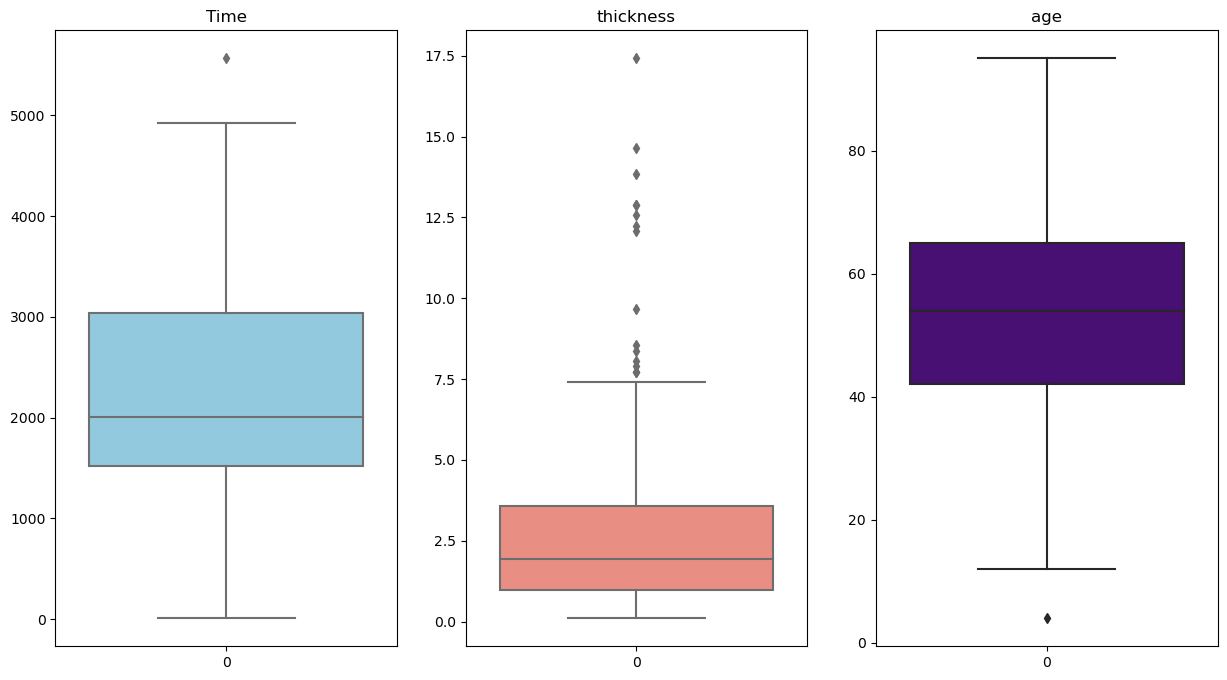

In [98]:
#Checking for outliers in the numerical variables

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,8))
plt.title('outliers in numerical data')

sns.boxplot(df_melanoma['time'],color='skyblue',ax=axes[0])
axes[0].set_title('Time')

sns.boxplot(df_melanoma['thickness'],color='salmon',ax=axes[1])
axes[1].set_title('thickness')

sns.boxplot(df_melanoma['age'],color='indigo',ax=axes[2])
axes[2].set_title('age')


plt.show()


### Observation:
The time boxplot shows that there is only one outlier. Which is the first and only surgery performed in 1962 having a survivaltime of 5565 which is above the average maximum.

The thickness boxplot shows many outliers.

The age boxplot also shows an oulier which indicates a 4year was also included in the surgery.

### Exploratory Data Analysis

In [13]:
#Total number of people who survived after the surgery
survival = df_melanoma['status']=='alive'
total_survival =survival[survival].count()
print("The total number of people who survived after the surgery is:",total_survival)


The total number of people who survived after the surgery is: 134


In [14]:
#number of females who partook in the surgeries
female_participants = df_melanoma['sex']=='Female'
df_melanoma[female_participants]['sex'].count()

126

In [15]:
#number of males who partook in the surgeries
male_participants = df_melanoma['sex']=='male'
df_melanoma[male_participants]['sex'].count()

79

### Univariate analysis for categorical data

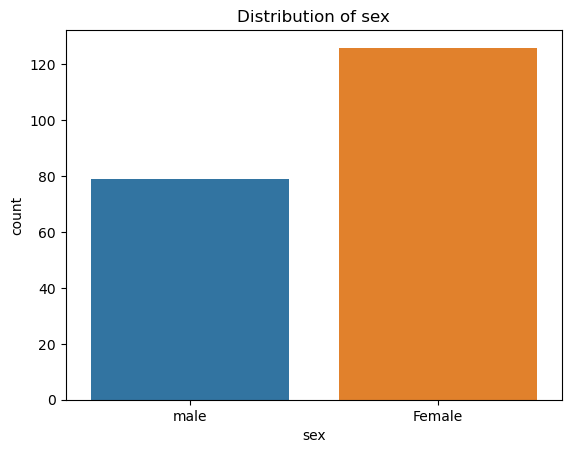

In [16]:
sns.countplot(x=df_melanoma['sex'])

plt.title('Distribution of sex')
plt.show()

### Observation:
more females underwent the surgery than males

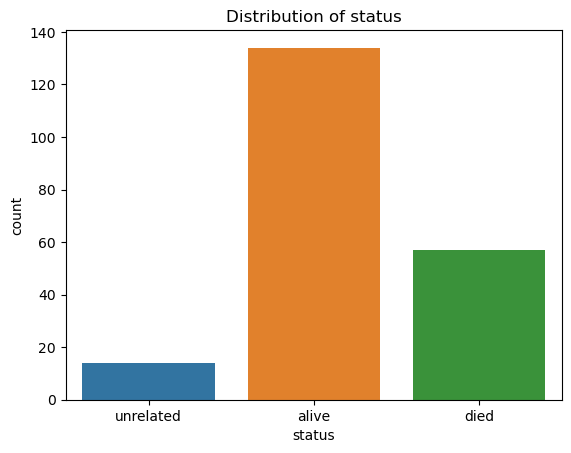

In [181]:
sns.countplot(x=df_melanoma['status'])

plt.title('Distribution of status')
plt.show()

### observation

The survival rate of the people who underwent the surgery is higher by about 137 whereas those who died from causes unrelated to their melanoma had the least survival rate of about 18.

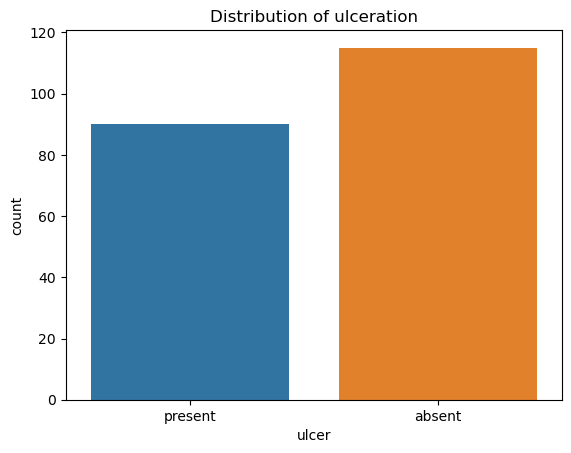

In [18]:
sns.countplot(x=df_melanoma['ulcer'])

plt.title('Distribution of ulceration')
plt.show()

### observation:
About 118 melanoma patients had no ulcers at the end of the surgery whiles about 90 people had ulcerations at the end of the time frame given.

### Univariate analysis for numerical variables

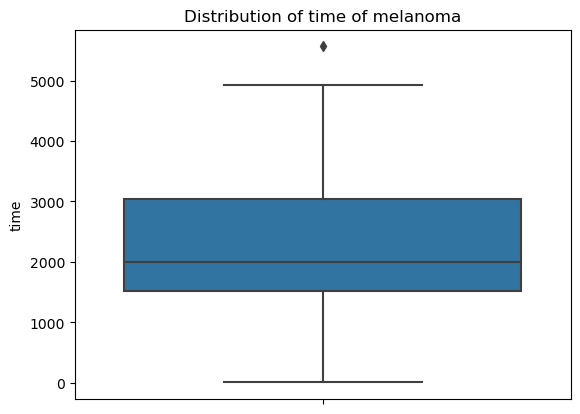

In [19]:
sns.boxplot(y=df_melanoma['time'])

plt.title('Distribution of Time')
plt.show()

### observation
Averagely, 75% of the melanoma patients had a survival day of 3000days,50% for about 2000days and 25% for about 1500days.

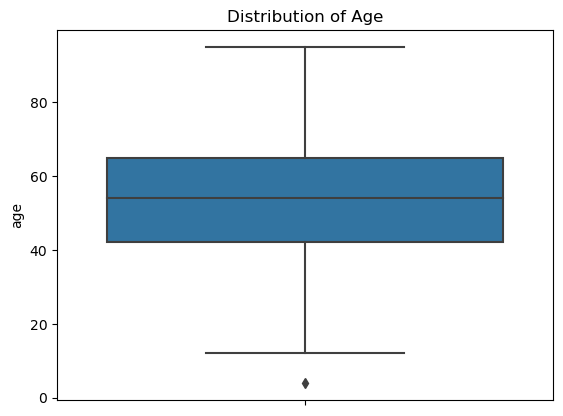

In [156]:
sns.boxplot(y=df_melanoma['age'])

plt.title('Distribution of Age')
plt.show()
plt.savefig('png')

### Observation:
25% of the melanoma patients were 42years, 50% were 54years, 75% were 65years, and there was one person with age 4years which was below the minimum age(oulier). 

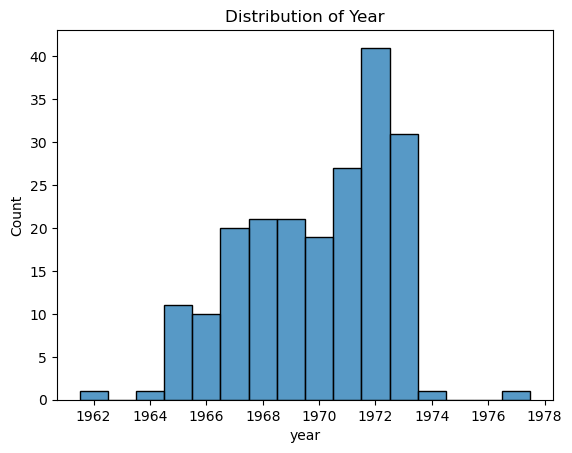

<Figure size 640x480 with 0 Axes>

In [160]:
sns.histplot(df_melanoma['year'],discrete=True)

plt.title('Distribution of Year')
plt.show()
plt.savefig('png')

### Observation
More surgeries were performed in 1972 whiles 1962,1974 and 1977 had the least and equal nnumber of surgeries. There were no surgeries in 1963, 1975 and 1976.

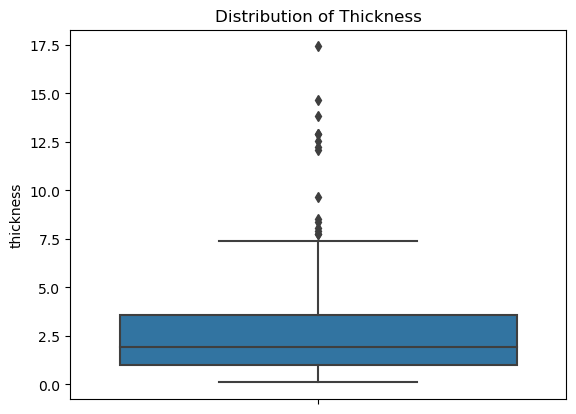

In [23]:
sns.boxplot(y=df_melanoma['thickness'])

plt.title('Distribution of Thickness')
plt.show()

### Bivariate Analysis

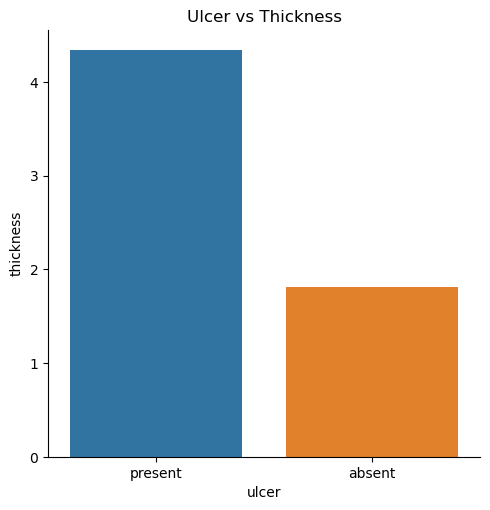

In [24]:
#The relationship of ulcer and thickness
sns.catplot(x='ulcer',y='thickness',
            data=df_melanoma,
            kind='bar',
            errorbar=None)

plt.title('Ulcer vs Thickness')
plt.show()

### Observation:
The thickness of tumour in patients who had ulcers is higher than those who had no ulcers.

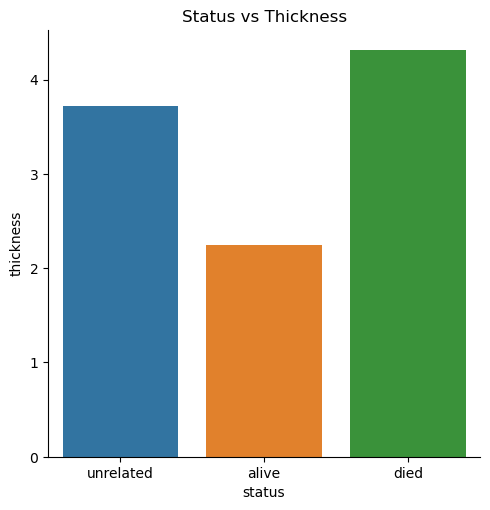

In [71]:
sns.catplot(x='status',y='thickness',
            data=df_melanoma,
            kind='bar',
            errorbar=None)

plt.title('Status vs Thickness')
plt.show()

### Observation:

The thickness of tumor for patients who dies from melanoma was very high as compared to those who survived after the surgery.

Also, those whose death was unrelated to the cause of melanoma, tend to have a significant increase of thickness of tumor.

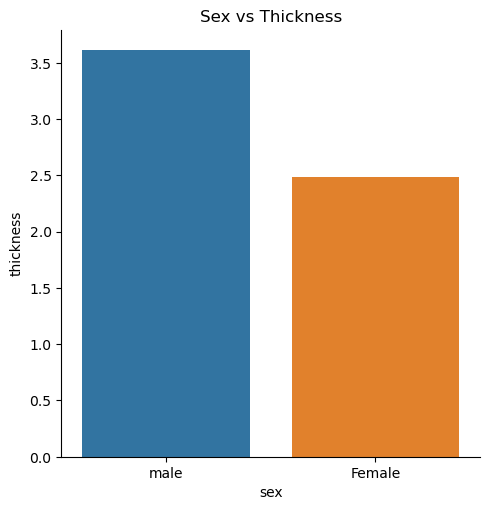

In [26]:
sns.catplot(x='sex',y='thickness',
            data=df_melanoma,
            kind='bar',
            errorbar=None)

plt.title('Sex vs Thickness')
plt.show()

### Observation
Males had higher thickness of tumors than the females.

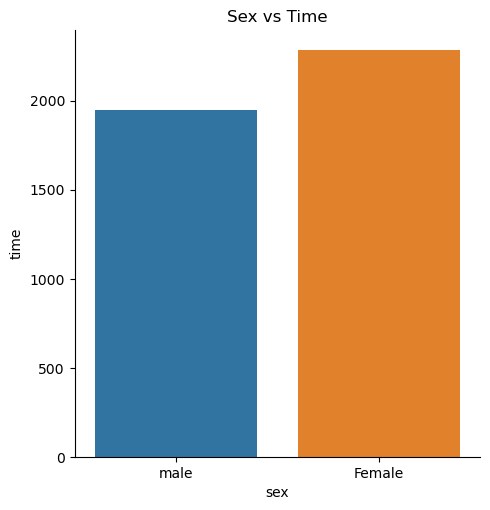

In [27]:
sns.catplot(x='sex',y='time',
            data=df_melanoma,
            kind='bar',
            errorbar=None)

plt.title('Sex vs Time')
plt.show()

### Observation
The survival time for females is higher than the the survival time for males.

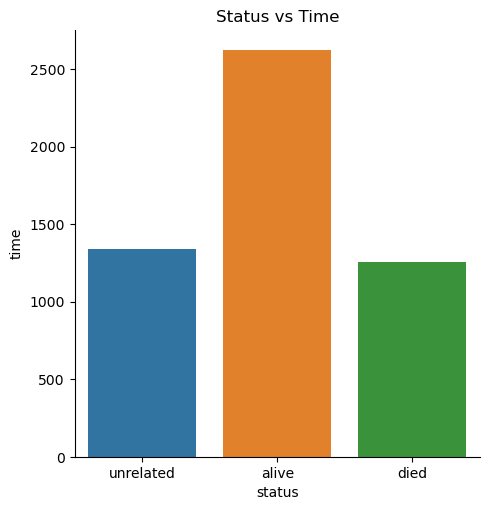

In [73]:
sns.catplot(x='status',y='time',
            data=df_melanoma,
            kind='bar',
            errorbar=None
            )

plt.title('Status vs Time')
plt.show()

### Observation
The survival time of those alive is high whereas there is an insignificant difference between the survival time of melanoma patients who died as a result of the surgery and those who died due to causes unrelated to the surgery.

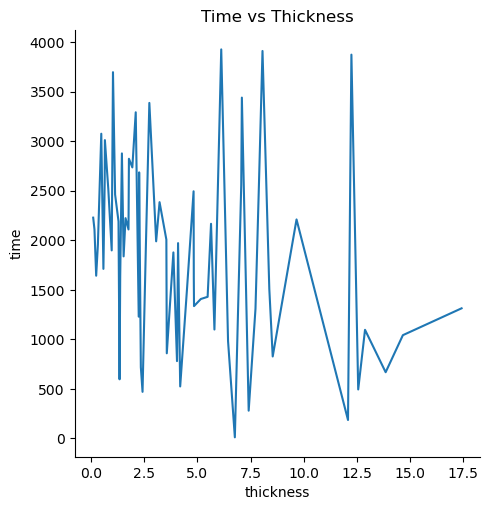

In [30]:
sns.relplot(x='thickness',y='time',
            data=df_melanoma,
            kind='line',
            errorbar=None)

plt.title('Time vs Thickness')
plt.show()

### Observation: 
The smaller the thickness of tumor, the higher the survival time.

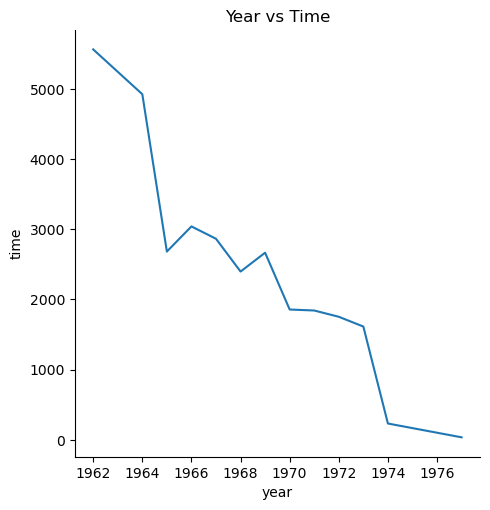

In [31]:
sns.relplot(x='year',y='time',
            data=df_melanoma,
            kind='line',
            errorbar=None)

plt.title('Year vs Time')
plt.show()

### Observation
The current the surgery, the lower the survival time.

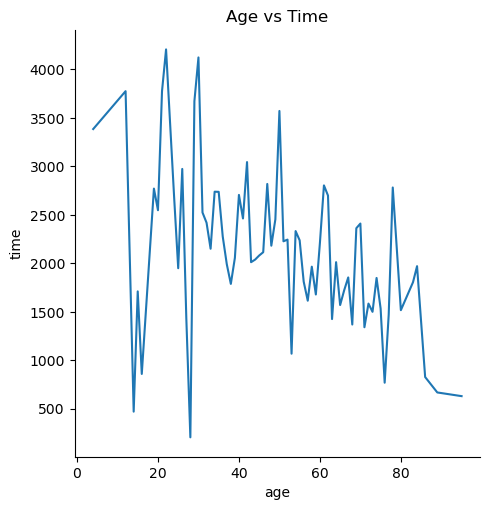

In [32]:
sns.relplot(x='age',y='time',
            data=df_melanoma,
            kind='line',
            errorbar=None)

plt.title('Age vs Time')
plt.show()

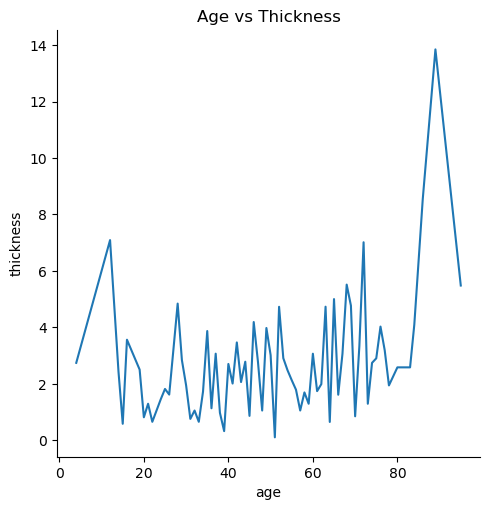

In [80]:
sns.relplot(x='age',y='thickness',
            data=df_melanoma,
            kind='line',
            errorbar=None)

plt.title('Age vs Thickness')
plt.show()

### Observation
Melanoma patients between the ages of 20 and 60 have a small thickness of tumors whereas ages below 20 and above 60 have high thickness of tumors.

### Multivariate Analysis

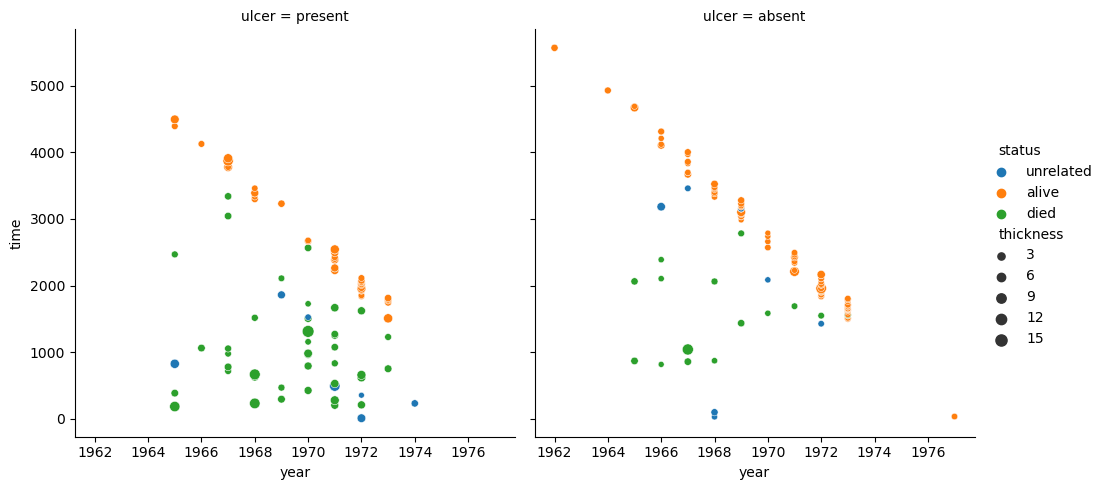

In [161]:
#The Relationship Between thickness, ulcer,
sns.relplot(x='year',y='time',
            data=df_melanoma,
            hue='status',
            kind='scatter',
            col='ulcer',
            size='thickness')
plt.show()

### Observation
In the first figure, most Melanoma patients who have ulceration and are still alive have less thickness of tumors and their survival time since the operation is dependant on the year the surgery was performed.
Also, those whose death was as a result of the melanoma had high thickness of tumor and ulcerations as and those who were able to survive for quite a long time following the surgery have small thickness of tumors.

In the second figure, Melanoma patients who are alive following the surgery have no ulcerations and small thickness of tumors and their survival time reduces when the surgery is current.
Despite the time of surgery, those who died as a result of the surgery, had no ulcerations but had bigger thickness of tumors had a lower survival time following the surgery.

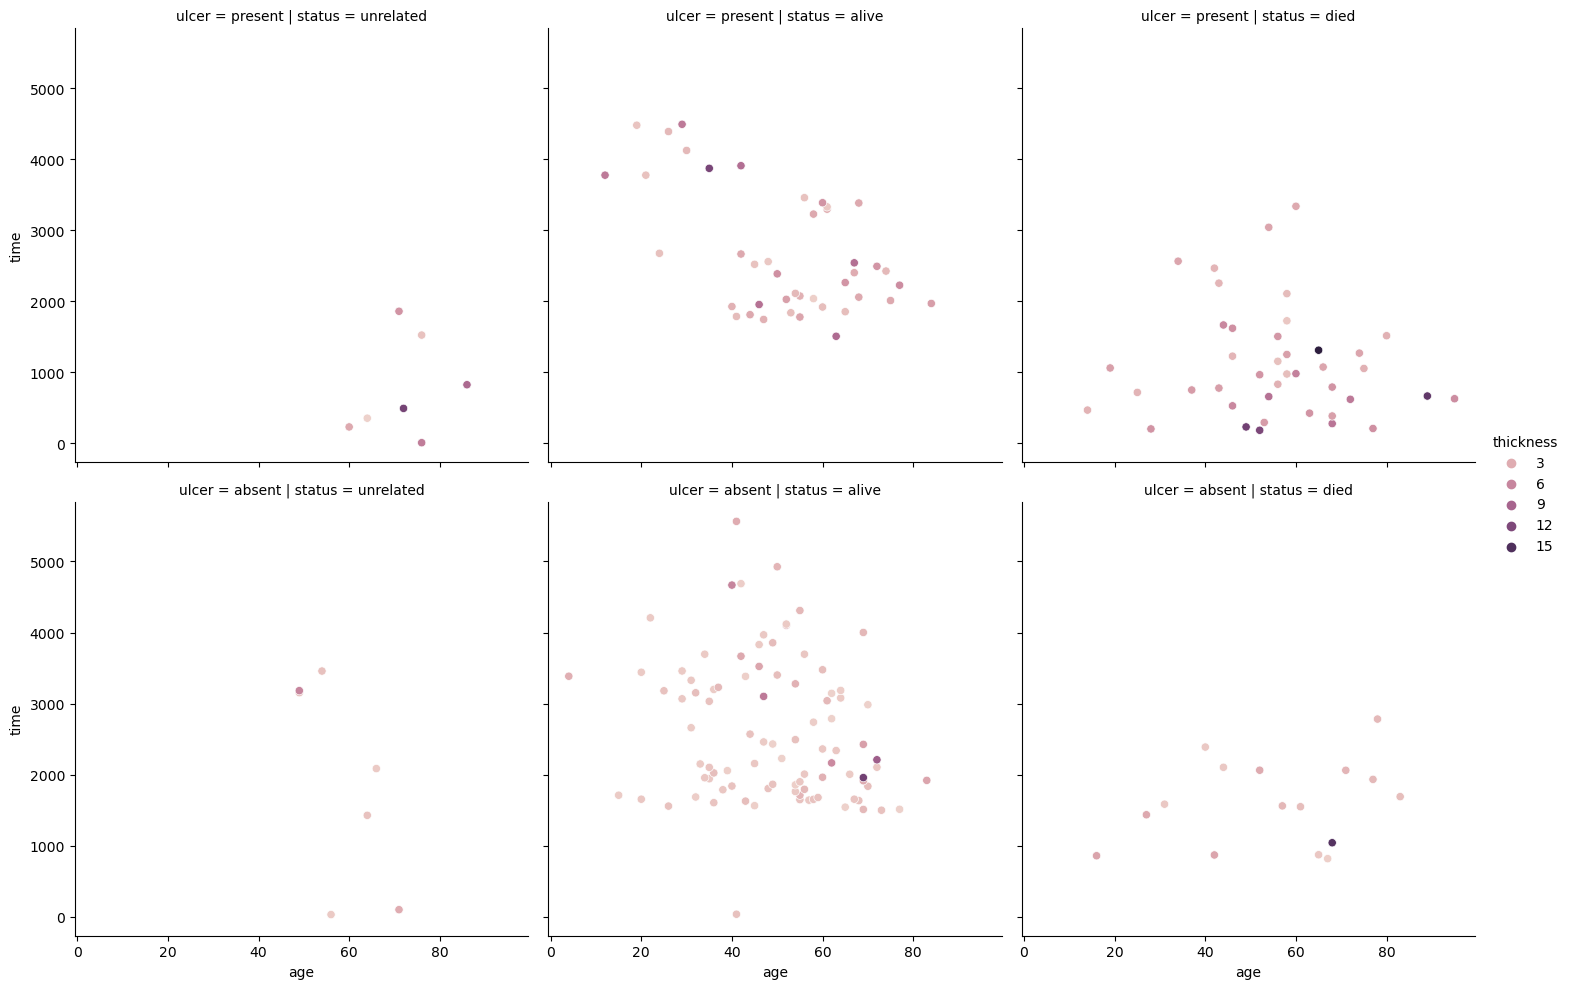

In [91]:
sns.relplot(x='age',y='time',
            data=df_melanoma,
            hue='thickness',
            kind='scatter',
            col='status',
            row='ulcer')

plt.show()

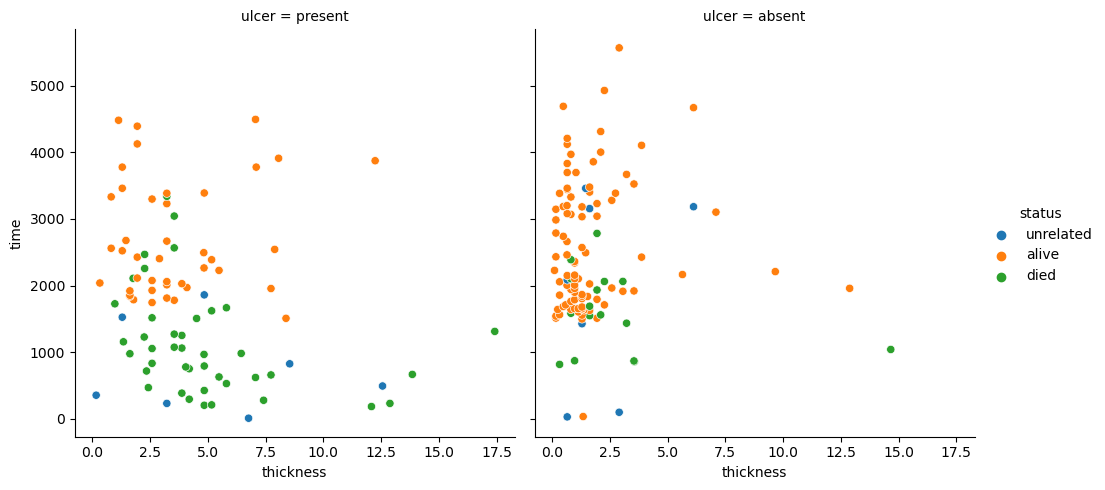

In [106]:
sns.relplot(x='thickness',y='time',
            data=df_melanoma,
            hue='status',
            kind='scatter',
            col='ulcer')
plt.show()

### Hypothesis Test

### Defining Null and Alternative Hypothesis
Null_hypothesis = patients with a thick and/or ulcerated tumour have an increased chance of death from melanoma

Alternative_hypothesis = patients with a thick and ulcerated tumour do not have an increased chance of death from melanoma

alpha = 0.5

In [148]:
#using t-test

#Since there are outliers in the thickness it will be unfair to use the mean hence the median
df_melanoma.groupby('ulcer')[['thickness']].median()

,thickness
ulcer,
absent,1.29
present,3.54


In [147]:
#Calculting the standard deviation
df_melanoma.groupby('ulcer')[['thickness']].std()

,thickness
ulcer,
absent,2.185859
present,3.215295


In [182]:
#Grouping by ulcerations to count the number of thickness per ulcerations.
df_melanoma.groupby('ulcer')[['thickness']].count()

,thickness
ulcer,
absent,115
present,90


In [115]:
#Calculating t_stat
numerator=1.29-3.54
numerator

-2.25

In [118]:
denominator=np.sqrt(((2.185859**2)/115)/((3.215295**2)/90))
denominator

0.6014141660509297

In [119]:
t_stat=numerator/denominator
t_stat

-3.7411822451309913

In [120]:
from scipy.stats import t

In [142]:
#Calculating the p-value
1-t.cdf(t_stat,(205-1)*(7-1))

0.999904180940367

### Conclusion
Since the p_value(0.999904180940367) is greater than alpha(0.05), we fail to reject the null hypothesis.
Therefore, we can conclude that patients with a thick and/or ulcerated tumour have an increased chance of death from melanoma